In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Model, Sequential 

In [20]:
#Dataset: Lanigan's Ball(traditional Irish song)
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split("\n")
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
V = len(tokenizer.word_index)
print(f'word index: {tokenizer.word_index}')
print(f'Number of unique tokens: {V}')

word index: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 

In [22]:
#Preprocessing: 
input_sequences = []
#Generate each possible substring:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        subphrase = token_list[: i + 1]
        input_sequences.append(subphrase)
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
#Create subsequent targets for each substring:
X, labels = input_sequences[:, :-1], input_sequences[:, -1]
#Convert labels into one-hot encoded arrays:
Y = to_categorical(labels, num_classes = V + 1)

In [25]:
#Build the model:
#Hyperparameters:
T = X.shape[1]
D = 64
M = 20

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i)
x = Bidirectional(LSTM(M))(x)
x = Dense(V + 1, activation = 'softmax')(x)

model = Model(i, x)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [26]:
r = model.fit(
    X, Y,
    epochs = 500
)

Epoch 1/500
15/15 [==============================] - 13s 13ms/step - loss: 5.5689 - accuracy: 0.0155
Epoch 2/500
15/15 [==============================] - 0s 11ms/step - loss: 5.5437 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 5.4837 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 11ms/step - loss: 5.3237 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 11ms/step - loss: 5.1373 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0782 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0410 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 12ms/step - loss: 5.0133 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 11ms/step - loss: 4.9871 - accuracy: 0.0508
Epoch 10/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9591 - accuracy: 0.053

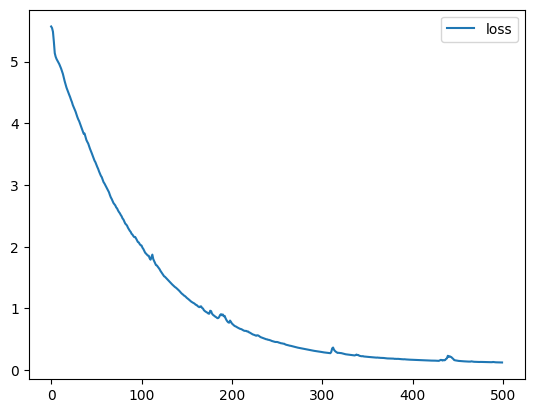

In [28]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()
plt.show()

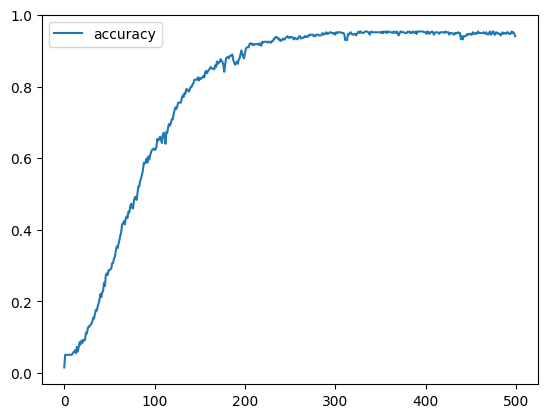

In [29]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.legend()
plt.show()

In [63]:
seed_text = "Laurence went to Dublin"
next_words = 100
for _ in range(next_words):
	sequence = tokenizer.texts_to_sequences([seed_text])[0]
	sequence = pad_sequences([sequence], maxlen = T, padding='pre')
	probabilities = model.predict(sequence)
	predicted = np.argmax(probabilities, axis=-1)[0]
	if predicted != 0: 
		output_word = tokenizer.index_word[predicted]
		seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 23ms/step
Laurence went to Dublin the room as bees round a cask soon further lick lanigan one jeremy lanigan forget nelly for nelly nelly me me mavrone painted water together ball ball was strangled one jeremy lanigan lanigan lanigan lanigan forget nelly ball nelly ball them might jig jig cask suppose suppose suppose suppose mad were ground suppose ground ground ground ground ground ground ground suppose runctions relations suppose i ask suppose suppose suppose suppose mad at relations relations suppose ground same lanigans ball as ogradys painted painted painted painted water together ball a rose ask cask painted water painted taras one hoops hall hall


In [64]:
#To avoid word repetitions the longer the sentence gets, we output a random word from top 3 highest probabilities:
seed_text = "Laurence went to Dublin"
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    probabilities = model.predict(token_list)
    choice = np.random.choice([1,2,3])
    predicted = np.argsort(probabilities)[0][-choice]
    if predicted != 0:
	    output_word = tokenizer.index_word[predicted]
	    seed_text += " " + output_word	
print(seed_text)

1/1 [==============================] - 0s 22ms/step
Laurence went to Dublin round the midst as time was red was round nelly me as being near strangled strangled hearty hearty father strangled strangled glisten father ask cried murther again murther fainted relations again ball lashings of acres the rat wall ladies ructions all of time weeks was lanigan swore weeks was near call glisten strangled hearty suppose doing me me mavrone lads hoops water suppose doing weeks me me mavrone piper hoops was strangled we strangled hall hoops water together all of acres was acres of punch ground a whirligig out and and tea tea suppose free mccarthy invitation we banished father
